In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from src.plot_network import plot_topic_pairs_ntw
from src.aggregator import *

## Data

In [2]:
cols_keep=['heading', 'speaker', 'link_video', 'link_steno', 'index_pk',
       'index_snd', 'year', 'month', 'day', 'time', 'seconds_from_start',
       'video_link_wo_time', 'text_wo_punct', 'date', 'koosseis', 'fation',
       'ntoks', 'text_splitted', 'ntoks_splitted', 'doc_id', 'topic_id',
       'topic_prob', 'Name','Name_red_outliers']
df=pd.read_csv('data/interim/topics2022/stenos_cleaned_faction2022_topics.csv')[cols_keep]
df.shape

(465494, 24)

In [3]:
#normalize factions
df['fation']=df.fation.replace({'Fraktsiooni mittekuuluvad saadikud': 'Fraktsioonidesse mittekuulunud Riigikogu liikmed',
                               'Fraktsiooni mittekuuluvad Riigikogu liikmed':'Fraktsioonidesse mittekuulunud Riigikogu liikmed'})

In [4]:
df_topics=pd.read_excel('data/interim/topics2022/topics_info2022_manual_review.xlsx')
df_topics=df_topics.set_index(df_topics.Name)
df_topics.shape

(2107, 9)

In [5]:
topics_meaningful=df_topics[df_topics.manual_cluster=='sisukas'].Name.tolist()
len(topics_meaningful)

1164

In [6]:
df['topic4analysis']=np.where(df.Name_red_outliers.isin(topics_meaningful), df.Name_red_outliers, '-1')

## Colors for plotting

In [7]:
colors=json.loads(Path('utils/colors.json').read_text())
colors=list(colors.keys())[10:]

## Detect environmental topics

In [8]:
topics_environment=df_topics[df_topics.related2nature=='yes'].Name.tolist()
len(topics_environment)

37

In [9]:
df['topic4analysis_env']=np.where(df.topic4analysis.isin(topics_environment), df.topic4analysis, None)
df['topic4analysis_env_bin']=np.where(df.topic4analysis.isin(topics_environment), True, False)

<Axes: ylabel='Name'>

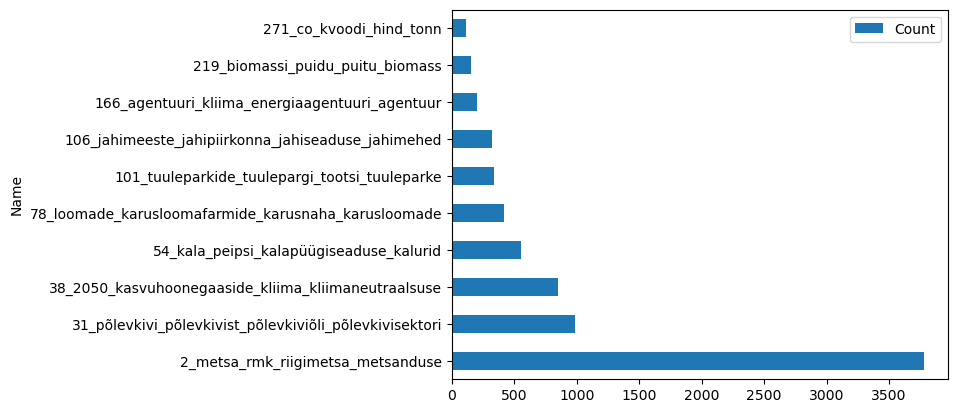

In [10]:
df_topics[df_topics.related2nature=='yes'].head(10)[['Name','Count']].plot(kind='barh')

In [11]:
df_topics[df_topics.related2nature=='yes'].shape

(37, 9)

<Axes: ylabel='Name'>

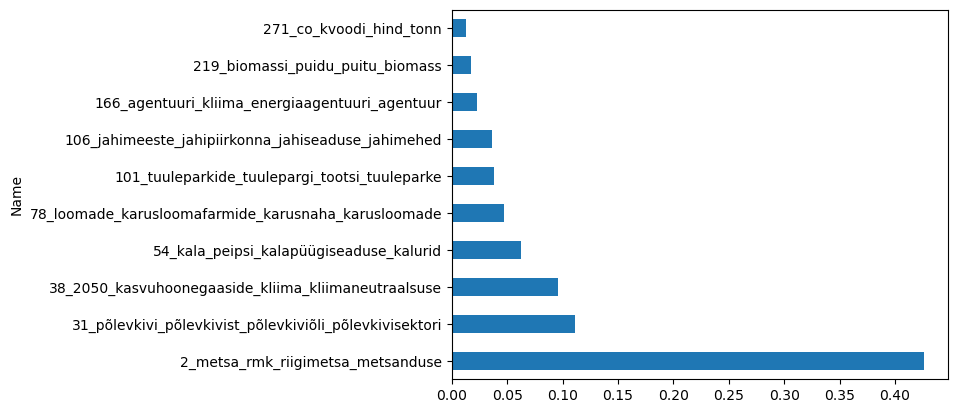

In [12]:
#topics as % of all environment topics
(df_topics[df_topics.related2nature=='yes']['Count']/df_topics[df_topics.related2nature=='yes']['Count'].sum()).head(10).plot(kind='barh')

In [13]:
#environment topics as % of all topics
df_topics[df_topics.related2nature=='yes']['Count'].sum()/df_topics['Count'].sum()*100

2.160673595964273

## See progression of environment topics over the years

In [14]:
# Step 1: Count occurrences of each topic per year
topic_counts = df.groupby(['year', 'topic4analysis']).size().reset_index(name='count')
# Step 2: Calculate the total occurrences per year
year_totals = df.groupby('year').size().reset_index(name='total_count')
# Step 3: Merge the counts and totals, then calculate percentages
df_long_perc = pd.merge(topic_counts, year_totals, on='year')
df_long_perc['percentage'] = (df_long_perc['count'] / df_long_perc['total_count']) * 100
df_long_perc.head()

,year,topic4analysis,count,total_count,percentage
0,2010,-1,17449,34072,51.212139
1,2010,1000_arveid_arvete_arvetele_arve,1,34072,0.002935
2,2010,1002_ravimite_ravimiameti_hinnakokkuleppe_amr,13,34072,0.038154
3,2010,1003_eleringi_võrgutasu_võrgutasude_elektriarvest,10,34072,0.029350
4,2010,1004_menetlusaeg_haldusasjade_tsiviilasjade_ts...,11,34072,0.032285


In [15]:
df_wide_perc=df_long_perc.pivot(index='year', columns='topic4analysis', values='percentage').T
df_wide_perc=df_wide_perc.fillna(0)
df_wide_perc.head()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
topic4analysis,,,,,,,,,,,,,,
-1,51.212139,51.843728,53.862917,53.735974,51.736299,50.287908,50.087737,49.781924,51.452345,51.650068,50.184753,54.945224,52.447214,52.710504
1000_arveid_arvete_arvetele_arve,0.002935,0.000000,0.000000,0.010342,0.006354,0.003554,0.027574,0.002521,0.000000,0.080182,0.000000,0.000000,0.003453,0.000000
1002_ravimite_ravimiameti_hinnakokkuleppe_amr,0.038154,0.000000,0.035149,0.015513,0.006354,0.007109,0.005014,0.045380,0.027231,0.021101,0.151996,0.000000,0.022444,0.010560
1003_eleringi_võrgutasu_võrgutasude_elektriarvest,0.029350,0.020693,0.066784,0.031025,0.028594,0.031990,0.042615,0.000000,0.006051,0.000000,0.002621,0.007679,0.025896,0.000000
1004_menetlusaeg_haldusasjade_tsiviilasjade_tsiviilasjades,0.032285,0.024831,0.028120,0.000000,0.019063,0.007109,0.005014,0.005042,0.012103,0.004220,0.000000,0.028156,0.010359,0.010560


In [16]:
df_wide_perc_env=df_wide_perc[df_wide_perc.index.isin(topics_environment)]
df_wide_perc_env.shape

(37, 14)

In [17]:
df_wide_perc_env.sort_values([2010], ascending=False).head(3).index.tolist()

['2_metsa_rmk_riigimetsa_metsanduse',
 '54_kala_peipsi_kalapüügiseaduse_kalurid',
 '166_agentuuri_kliima_energiaagentuuri_agentuur']

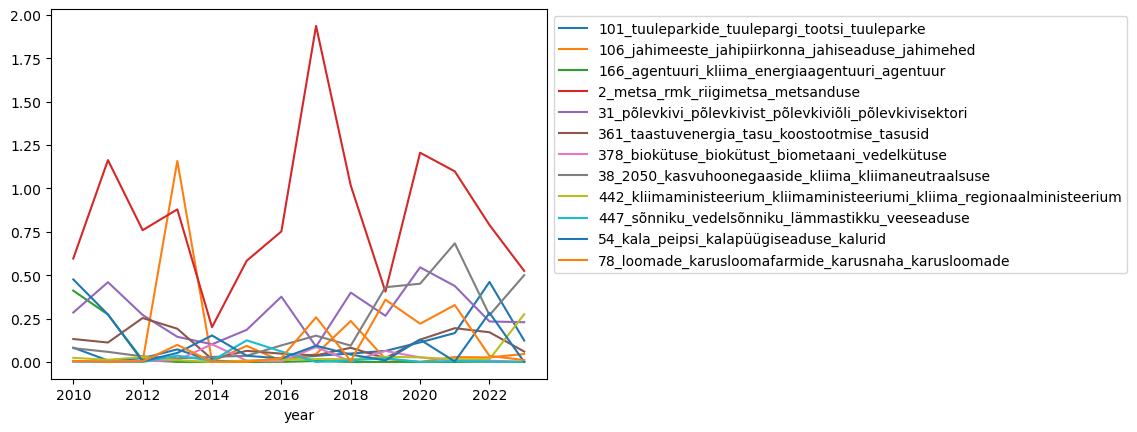

In [18]:
#keep top 3 topics per year
top_env_topics_yearly=[]
n_per_year=3
for year in df_wide_perc_env.columns:
    tops_=df_wide_perc_env.sort_values(year, ascending=False).head(n_per_year).index.tolist()
    top_env_topics_yearly.extend(tops_)

top_env_topics_yearly=list(set(top_env_topics_yearly))
ax=df_wide_perc[df_wide_perc.index.isin(top_env_topics_yearly)].T.plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))

<Axes: xlabel='year'>

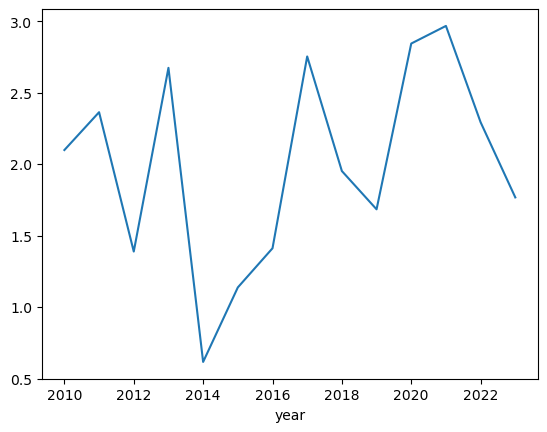

In [19]:
#% of environment related topics from all segments
df_wide_perc[df_wide_perc.index.isin(top_env_topics_yearly)].sum(axis=0).plot()

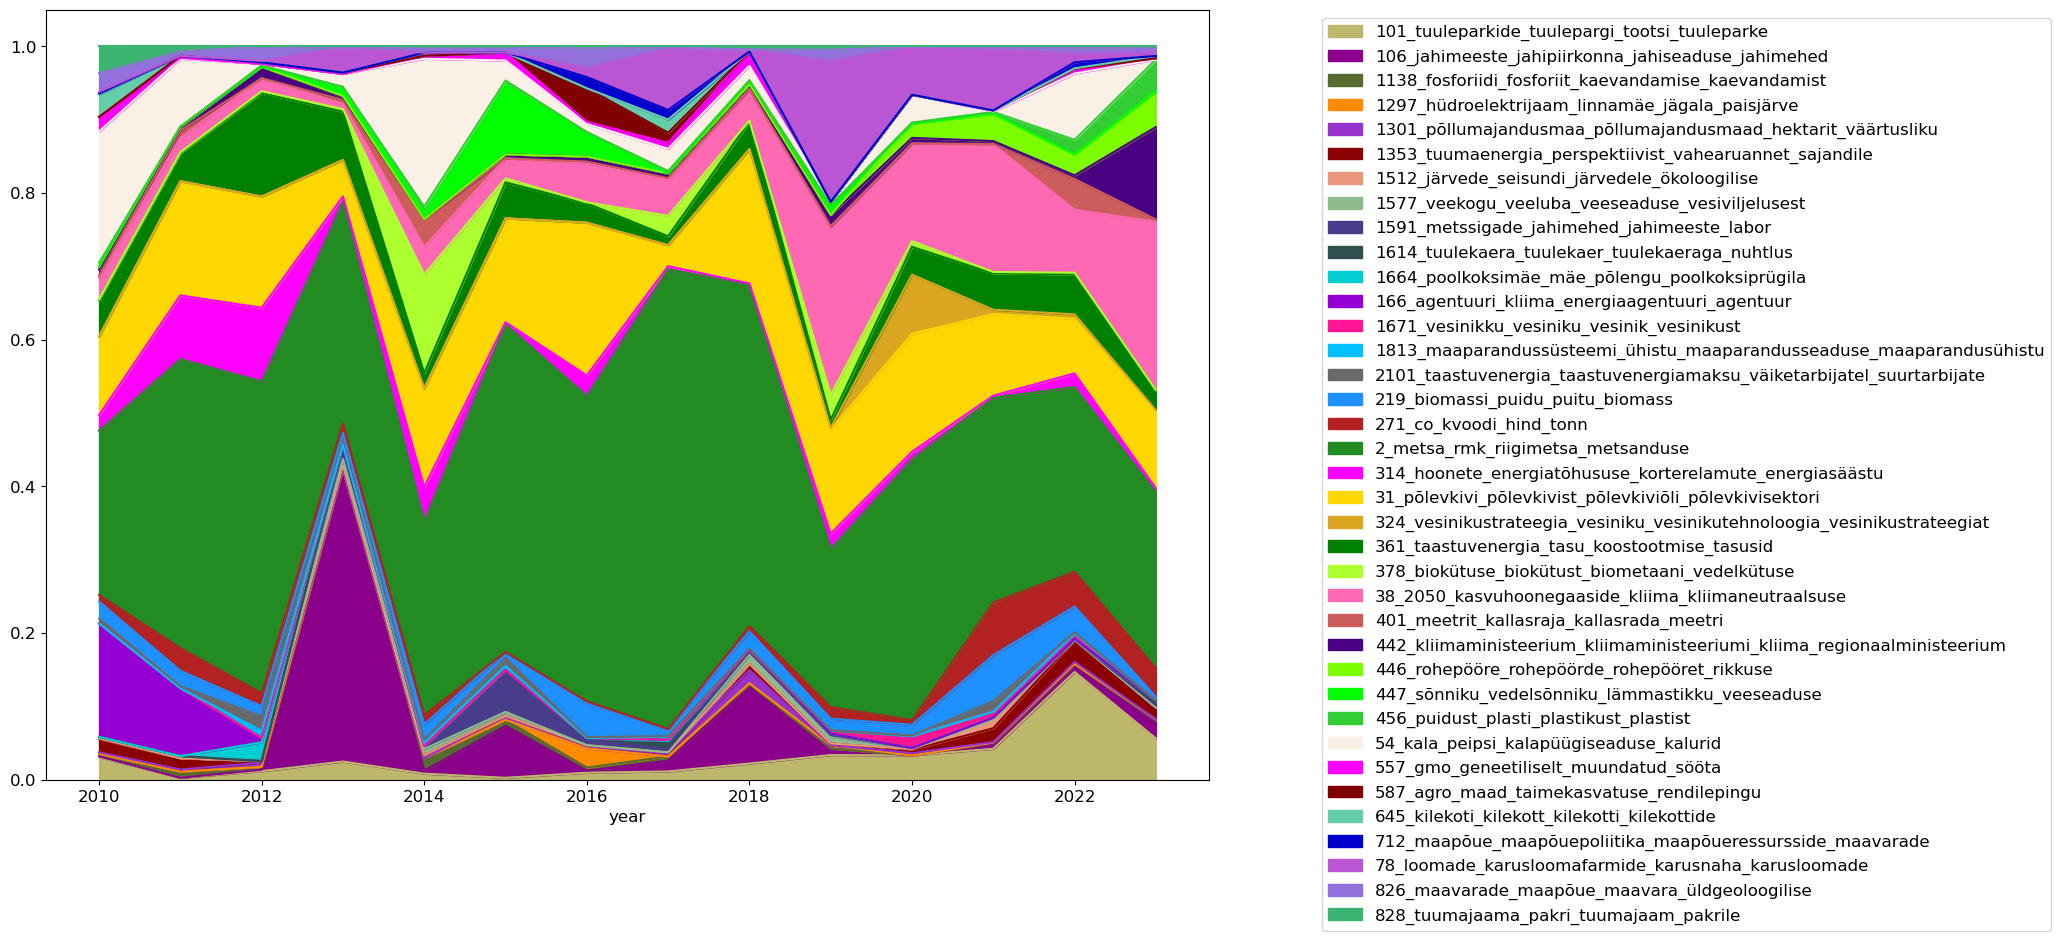

In [20]:
plot_topic_time_dynamics(df, colors, topic_col='topic4analysis_env', use_percentage=True, normalize_timesteps=True)

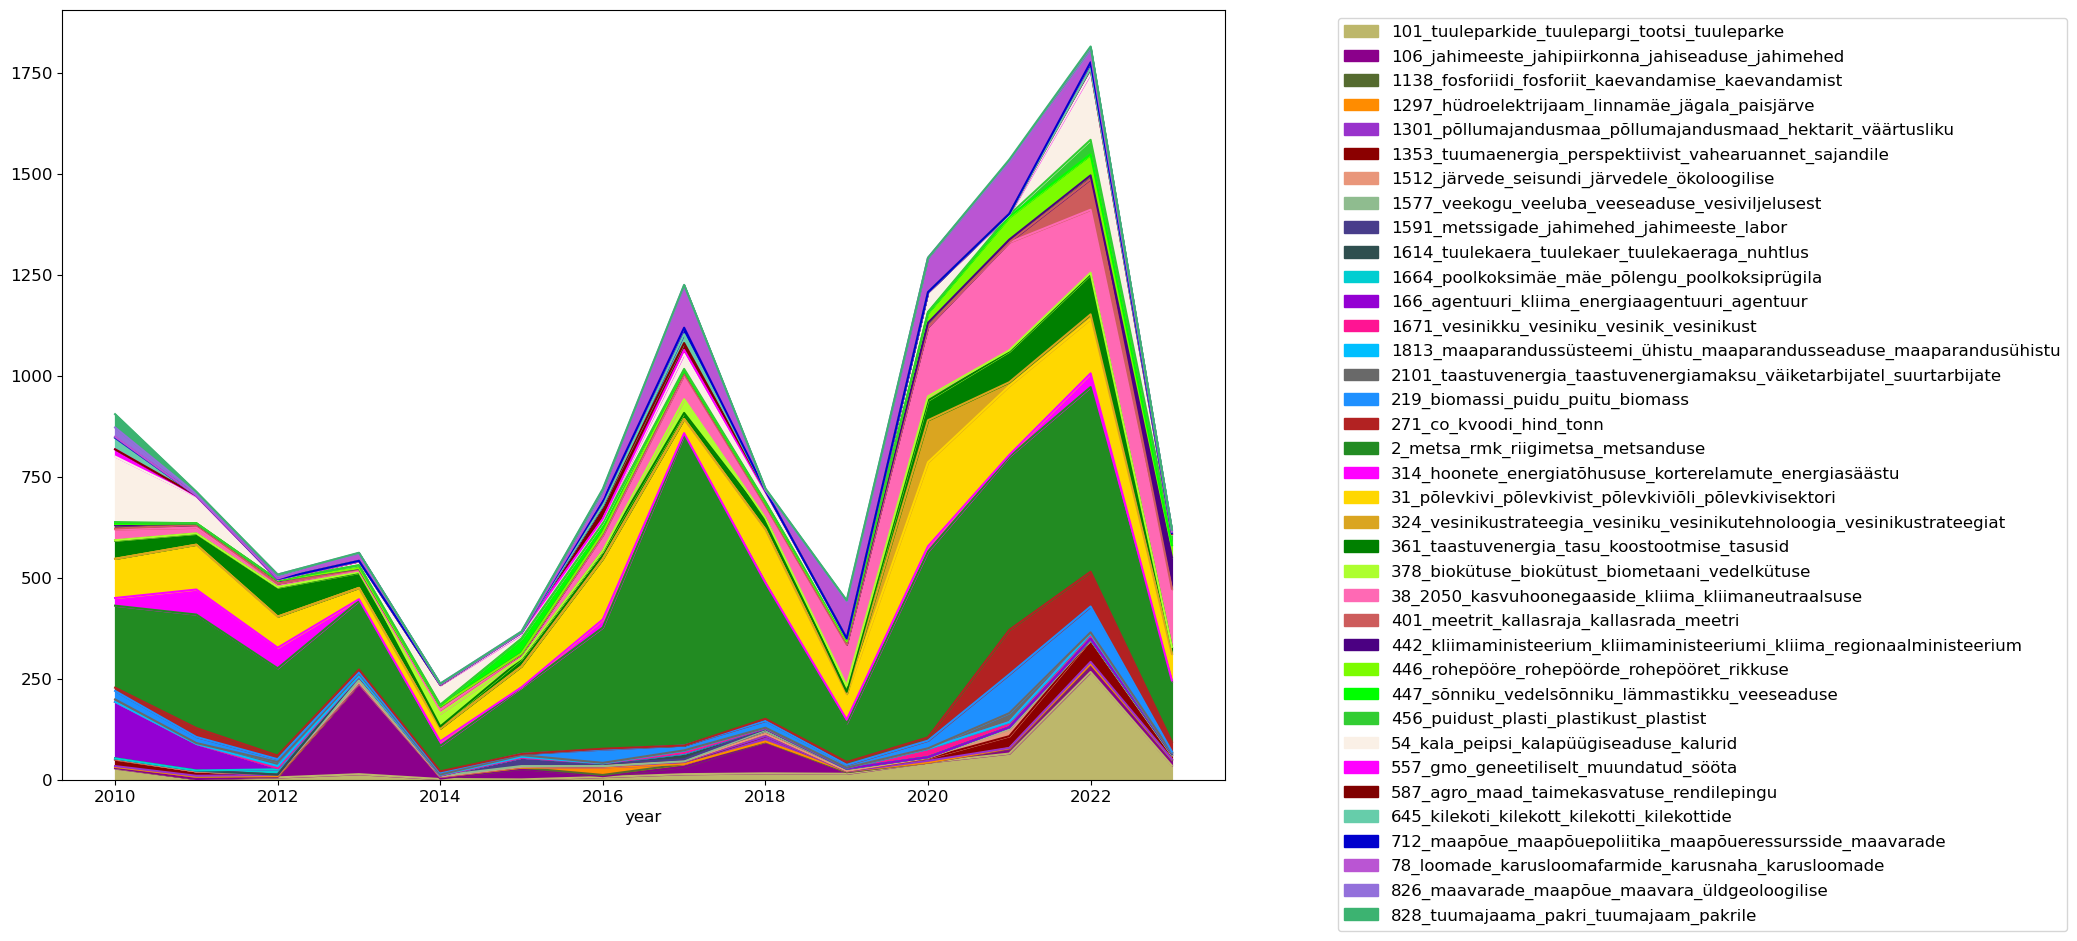

In [21]:
plot_topic_time_dynamics(df, colors, topic_col='topic4analysis_env', use_percentage=False, normalize_timesteps=True)

## Second method, take multiple topics per päevakorrapunkt and find share of päevakorrapunkt where environment topics are mentioned

In [22]:
df_env_topics_per_pk=df.groupby(['year','topic4analysis_env'])['index_pk'].nunique().reset_index()
df_year_pk_count=df.groupby('year')['index_pk'].nunique()
df_env_topics_per_pk=pd.merge(df_env_topics_per_pk, df_year_pk_count, on='year', how='left', suffixes=('_topic', '_year'))
df_env_topics_per_pk['share_pk']=df_env_topics_per_pk.index_pk_topic/df_env_topics_per_pk.index_pk_year
df_env_topics_per_pk.head()

,year,topic4analysis_env,index_pk_topic,index_pk_year,share_pk
0,2010,101_tuuleparkide_tuulepargi_tootsi_tuuleparke,9,1082,0.008318
1,2010,106_jahimeeste_jahipiirkonna_jahiseaduse_jahim...,1,1082,0.000924
2,2010,1138_fosforiidi_fosforiit_kaevandamise_kaevand...,2,1082,0.001848
3,2010,1301_põllumajandusmaa_põllumajandusmaad_hektar...,2,1082,0.001848
4,2010,1353_tuumaenergia_perspektiivist_vahearuannet_...,10,1082,0.009242


In [23]:
df_env_topics_per_pk_pivot=df_env_topics_per_pk.pivot(index='year', columns='topic4analysis_env', values='share_pk').T
df_env_topics_per_pk_pivot=df_env_topics_per_pk_pivot.fillna(0)
df_env_topics_per_pk_pivot.head()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
topic4analysis_env,,,,,,,,,,,,,,
101_tuuleparkide_tuulepargi_tootsi_tuuleparke,0.008318,0.002413,0.006250,0.003738,0.001164,0.001193,0.002026,0.00402,0.007752,0.006868,0.012438,0.026643,0.053998,0.022472
106_jahimeeste_jahipiirkonna_jahiseaduse_jahimehed,0.000924,0.000000,0.001563,0.014953,0.001164,0.009547,0.002026,0.00402,0.006645,0.002747,0.000000,0.007105,0.002077,0.006742
1138_fosforiidi_fosforiit_kaevandamise_kaevandamist,0.001848,0.003619,0.001563,0.000000,0.002328,0.002387,0.002026,0.00201,0.000000,0.000000,0.000000,0.003552,0.002077,0.002247
1297_hüdroelektrijaam_linnamäe_jägala_paisjärve,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005066,0.00000,0.001107,0.001374,0.000000,0.000000,0.001038,0.002247
1301_põllumajandusmaa_põllumajandusmaad_hektarit_väärtusliku,0.001848,0.002413,0.003125,0.000000,0.000000,0.002387,0.001013,0.00201,0.004430,0.000000,0.003731,0.001776,0.002077,0.000000


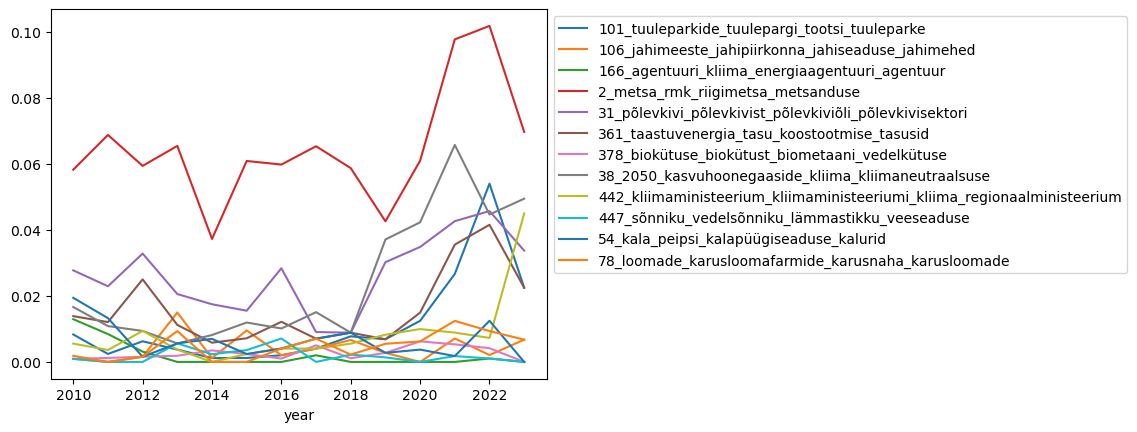

In [24]:
ax=df_env_topics_per_pk_pivot[df_env_topics_per_pk_pivot.index.isin(top_env_topics_yearly)].T.plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))

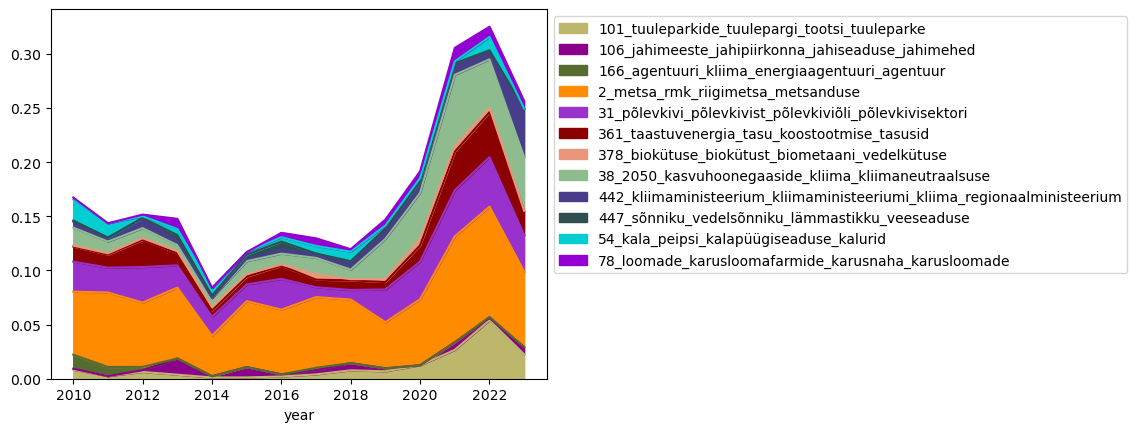

In [25]:
#list of topics which were 3 top env topics per year
ax=df_env_topics_per_pk_pivot[df_env_topics_per_pk_pivot.index.isin(top_env_topics_yearly)].T.plot.area(color=colors)
ax.legend(bbox_to_anchor=(1.0, 1.0))

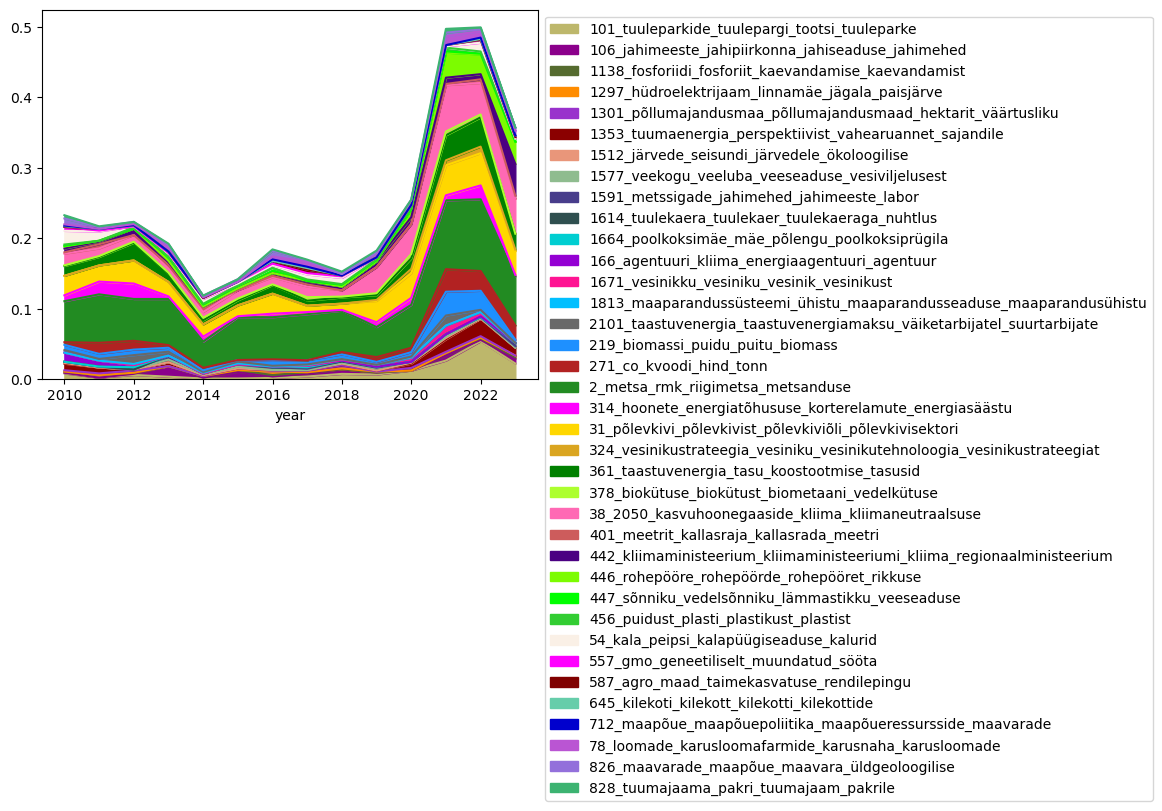

In [28]:
ax=df_env_topics_per_pk_pivot.T.plot.area(color=colors)
ax.legend(bbox_to_anchor=(1.0, 1.0))

## Most popular speakers mentioning environmental topics - count per segment

In [47]:
df_speaker_env_counts=df.groupby('speaker')['topic4analysis_env_bin'].value_counts().unstack().sort_values(True, ascending=False)
df_speaker_env_counts['p_env']=df_speaker_env_counts[True]/(df_speaker_env_counts[True]+df_speaker_env_counts[False])
df_speaker_env_counts.sort_values('p_env', ascending=False).head(20)

topic4analysis_env_bin,False,True,p_env
speaker,,,
Eesti Keskkonnaagentuuri metsaosakonna juhataja Taivo Denks,2.0,28.0,0.933333
Eesti Maaülikooli dotsent Rein Drenkhan,7.0,39.0,0.847826
Tartu Ülikooli juhtivteadur Asko Lõhmus,9.0,38.0,0.808511
Hanah Lahe,2.0,8.0,0.800000
Tartu Ülikooli vanemteadur Aveliina Helm,13.0,32.0,0.711111
Akadeemik Arvi Hamburg,1.0,2.0,0.666667
Keskkonnaminister Tõnis Mölder,102.0,167.0,0.620818
Keskkonnaagentuuri metsaosakonna juhataja Taivo Denks,4.0,6.0,0.600000
Keskkonnaminister Rain Epler,28.0,42.0,0.600000


In [30]:
df_top_env_speaker_counts=pd.DataFrame(df.groupby(['topic4analysis_env'])['speaker'].value_counts().groupby(level=0).head(5))
df_top_env_speaker_counts.head()

speaker
topic4analysis_env                            speaker                                        
101_tuuleparkide_tuulepargi_tootsi_tuuleparke Aivar Kokk                                   74
                                              Andres Metsoja                               37
                                              Annely Akkermann                             28
                                              Kristen Michal                               22
                                              Majandus- ja taristuminister Taavi Aas       20

In [31]:
df_top_env_speaker_counts[df_top_env_speaker_counts.index.get_level_values('topic4analysis_env')=='2_metsa_rmk_riigimetsa_metsanduse']

speaker
topic4analysis_env                speaker                                   
2_metsa_rmk_riigimetsa_metsanduse Rainer Vakra                           192
                                  Andres Metsoja                         166
                                  Külliki Kübarsepp                      158
                                  Keskkonnaminister Marko Pomerants      151
                                  Peeter Ernits                          135

In [32]:
df_top_env_speaker_counts[df_top_env_speaker_counts.index.get_level_values('topic4analysis_env')=='31_põlevkivi_põlevkivist_põlevkiviõli_põlevkivisektori']

speaker
topic4analysis_env                                 speaker                                                   
31_põlevkivi_põlevkivist_põlevkiviõli_põlevkivi... Jevgeni Ossinovski                                      65
                                                   Majandus- ja kommunikatsiooniminister Juhan Parts       64
                                                   Peaminister Jüri Ratas                                  57
                                                   Keskkonnaminister Marko Pomerants                       47
                                                   Rainer Vakra                                            47

In [33]:
df_top_env_speaker_counts[df_top_env_speaker_counts.index.get_level_values('topic4analysis_env')=='38_2050_kasvuhoonegaaside_kliima_kliimaneutraalsuse']

speaker
topic4analysis_env                                 speaker                        
38_2050_kasvuhoonegaaside_kliima_kliimaneutraal... Jevgeni Ossinovski          109
                                                   Peaminister Jüri Ratas       73
                                                   Yoko Alender                 52
                                                   Martin Helme                 41
                                                   Kalle Grünthal               40

## Most popular factions talking about environment issues - count per segment

In [48]:
df_faction_env_counts=df.groupby('fation')['topic4analysis_env_bin'].value_counts().unstack().sort_values(True, ascending=False)
df_faction_env_counts['p_env']=df_faction_env_counts[True]/(df_faction_env_counts[True]+df_faction_env_counts[False])
df_faction_env_counts.sort_values('p_env', ascending=False).head(20)

topic4analysis_env_bin,False,True,p_env
fation,,,
Erakonna Eestimaa Rohelised fraktsioon,1095,267,0.196035
Sotsiaaldemokraatliku Erakonna fraktsioon,29421,1657,0.053317
Isamaa fraktsioon,22725,1117,0.046850
Fraktsioonidesse mittekuulunud Riigikogu liikmed,13024,529,0.039032
Eesti Konservatiivse Rahvaerakonna fraktsioon,36858,1061,0.027981
Eesti Vabaerakonna fraktsioon,10962,306,0.027157
Eesti Reformierakonna fraktsioon,49180,1305,0.025849
Eesti Keskerakonna fraktsioon,47379,934,0.019332
Isamaa ja Res Publica Liidu fraktsioon,12670,224,0.017372


In [49]:
df_top_env_faction_counts=pd.DataFrame(df.groupby(['topic4analysis_env'])['fation'].value_counts().groupby(level=0).head(3))
df_top_env_faction_counts.head(10)

fation
topic4analysis_env                                 fation                                                  
101_tuuleparkide_tuulepargi_tootsi_tuuleparke      Isamaa fraktsioon                                    133
                                                   Eesti Reformierakonna fraktsioon                      69
                                                   Eesti Konservatiivse Rahvaerakonna fraktsioon         43
106_jahimeeste_jahipiirkonna_jahiseaduse_jahimehed Sotsiaaldemokraatliku Erakonna fraktsioon            122
                                                   Eesti Reformierakonna fraktsioon                      65
                                                   Fraktsioonidesse mittekuulunud Riigikogu liikmed      25
1138_fosforiidi_fosforiit_kaevandamise_kaevanda... Eesti Keskerakonna fraktsioon                          7
                                                   Fraktsioonidesse mittekuulunud Riigikogu liikmed       7
                                                   Eesti Konservatiivse Rahvaerakonna fraktsioon          3
1297_hüdroelektrijaam_linnamäe_jägala_paisjärve    Fraktsioonidesse mittekuulunud Riigikogu liikmed       7

In [50]:
df_top_env_faction_counts[df_top_env_faction_counts.index.get_level_values('topic4analysis_env')=='2_metsa_rmk_riigimetsa_metsanduse']

fation
topic4analysis_env                fation                                           
2_metsa_rmk_riigimetsa_metsanduse Sotsiaaldemokraatliku Erakonna fraktsioon     581
                                  Eesti Reformierakonna fraktsioon              447
                                  Isamaa fraktsioon                             345

In [51]:
df_top_env_faction_counts[df_top_env_faction_counts.index.get_level_values('topic4analysis_env')=='31_põlevkivi_põlevkivist_põlevkiviõli_põlevkivisektori']

fation
topic4analysis_env                                 fation                                           
31_põlevkivi_põlevkivist_põlevkiviõli_põlevkivi... Sotsiaaldemokraatliku Erakonna fraktsioon     165
                                                   Eesti Keskerakonna fraktsioon                 162
                                                   Eesti Reformierakonna fraktsioon              128

In [52]:
df_top_env_faction_counts[df_top_env_faction_counts.index.get_level_values('topic4analysis_env')=='38_2050_kasvuhoonegaaside_kliima_kliimaneutraalsuse']

fation
topic4analysis_env                                 fation                                               
38_2050_kasvuhoonegaaside_kliima_kliimaneutraal... Eesti Konservatiivse Rahvaerakonna fraktsioon     181
                                                   Sotsiaaldemokraatliku Erakonna fraktsioon         166
                                                   Eesti Reformierakonna fraktsioon                  132

## Environment topics segments % change per year

<Axes: title={'center': 'Environment related topics share of all segments'}, xlabel='year'>

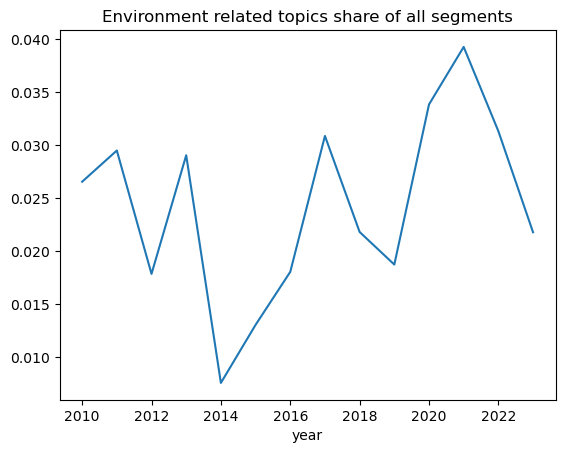

In [61]:
df_year_env_counts=df.groupby('year')['topic4analysis_env_bin'].value_counts().unstack()
df_year_env_counts['p_env']=df_year_env_counts[True]/(df_year_env_counts[True]+df_year_env_counts[False])
plt.title('Environment related topics share of all segments')
df_year_env_counts['p_env'].plot()

## Factions environment topics % change per year

In [62]:
df_faction_year_env_counts=df.groupby(['fation', 'year'])['topic4analysis_env_bin'].value_counts().unstack().sort_values(True, ascending=False)
df_faction_year_env_counts['p_env']=df_faction_year_env_counts[True]/(df_faction_year_env_counts[True]+df_faction_year_env_counts[False])
df_faction_year_env_counts.sort_values('p_env', ascending=False).head(20)

topic4analysis_env_bin                                 False  True     p_env
fation                                           year                       
Erakonna Eestimaa Rohelised fraktsioon           2010    898   225  0.200356
                                                 2011    197    42  0.175732
Sotsiaaldemokraatliku Erakonna fraktsioon        2017   1863   218  0.104757
Isamaa fraktsioon                                2017   1160   118  0.092332
Sotsiaaldemokraatliku Erakonna fraktsioon        2021   3035   282  0.085017
Fraktsioonidesse mittekuulunud Riigikogu liikmed 2017   1419   129  0.083333
Sotsiaaldemokraatliku Erakonna fraktsioon        2018   1285   114  0.081487
                                                 2019   1860   152  0.075547
Eesti Reformierakonna fraktsioon                 2013   1764   117  0.062201
Isamaa fraktsioon                                2022   7407   477  0.060502
Sotsiaaldemokraatliku Erakonna fraktsioon        2020   3679   229  0.058598
Isamaa fraktsioon                                2020   2339   138  0.055713
Fraktsioonidesse mittekuulunud Riigikogu liikmed 2013    900    53  0.055614
Sotsiaaldemokraatliku Erakonna fraktsioon        2013   2188   124  0.053633
Eesti Reformierakonna fraktsioon                 2022   4851   262  0.051242
Fraktsioonidesse mittekuulunud Riigikogu liikmed 2018   1643    88  0.050838
Sotsiaaldemokraatliku Erakonna fraktsioon        2012   2147   113  0.050000
                                                 2023    944    47  0.047427
Eesti Keskerakonna fraktsioon                    2020   1737    86  0.047175
Sotsiaaldemokraatliku Erakonna fraktsioon        2010   1870    81  0.041517

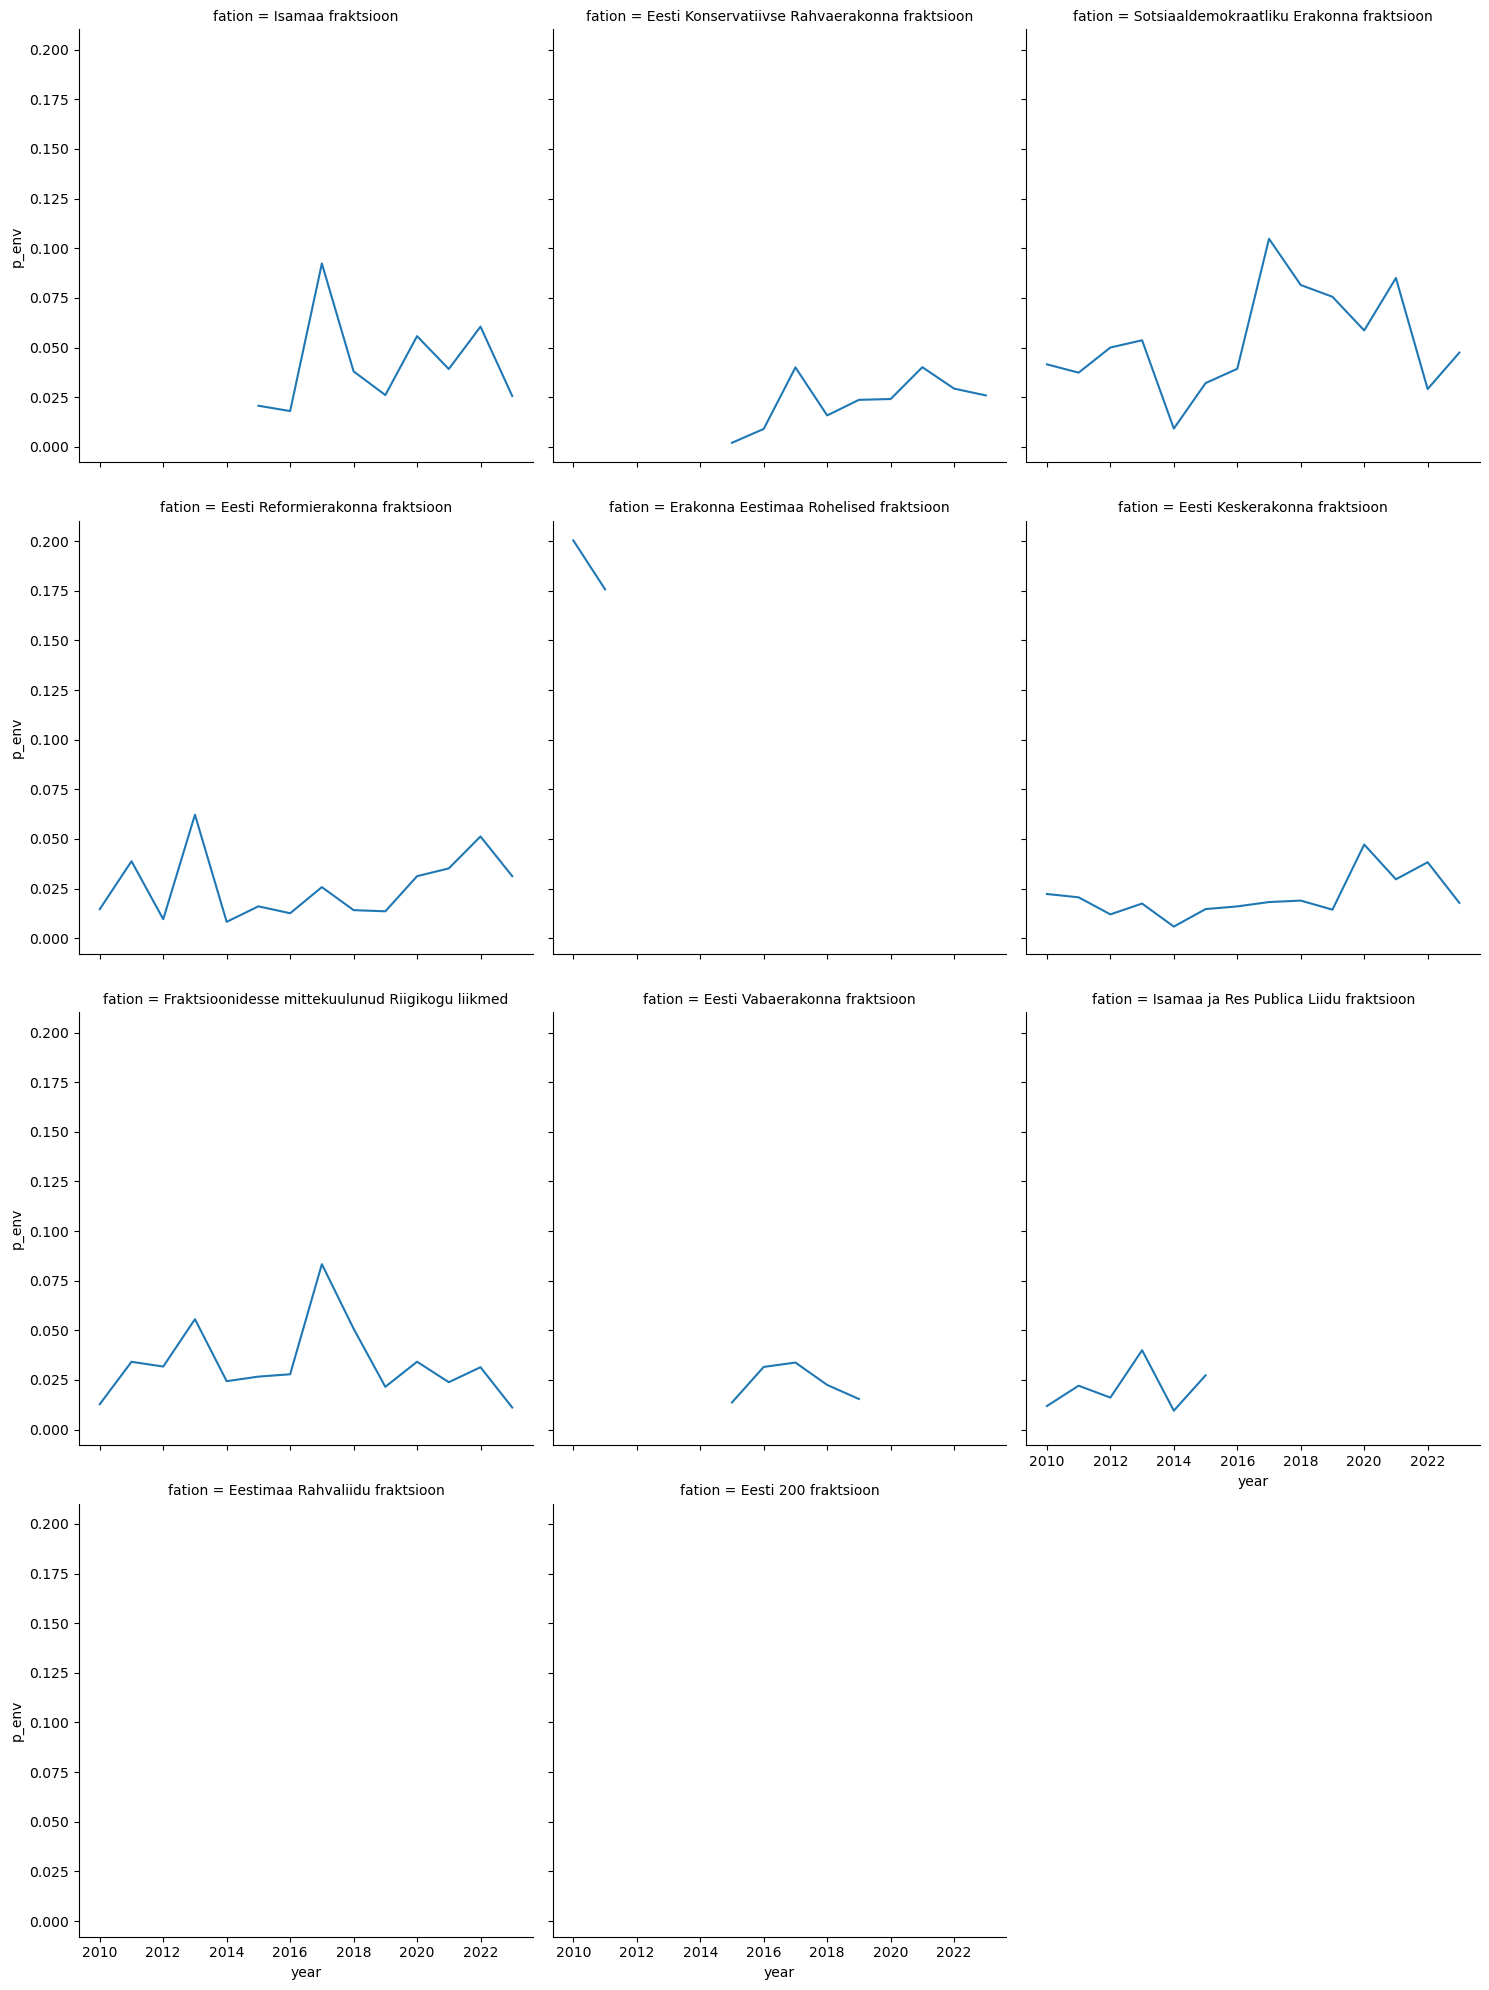

In [70]:
fg = sns.relplot(x='year', y='p_env', col='fation', 
                 data=df_faction_year_env_counts, kind='line',
                col_wrap=3)

## Environment topics PMI/NPMI

In [39]:
df_pmi=pd.read_excel('data/interim/topics2022/topic_pairs_pmi.xlsx')
df_pmi.shape

(192682, 10)

In [38]:
df_pmi.head()

,topic1,topic2,pair_count,p_pair,count1,count2,p1,p2,pmi,npmi
0,1000_arveid_arvete_arvetele_arve,1909_hoiuste_hoiustajatele_hoiustaja_tagatisfond,1,0.000002,39,23,0.000084,0.000049,9.019439,0.479034
1,604_istanbuli_konventsiooni_vägivalla_konvents...,1741_õigusloome_ultima_ratio_õigusloomet,1,0.000002,56,58,0.000120,0.000125,7.163067,0.380439
2,1888_vande_vanne_astub_ametisse,175_puudega_puude_sügava_laste,1,0.000002,40,272,0.000086,0.000584,5.419012,0.287811
3,604_istanbuli_konventsiooni_vägivalla_konvents...,174_kiriku_kirik_kirikule_kirikutele,1,0.000002,56,224,0.000120,0.000481,5.213693,0.276906
4,1888_vande_vanne_astub_ametisse,1737_reformierakond_vale_dogma_ideoloogiast,1,0.000002,40,83,0.000086,0.000178,7.131436,0.378759


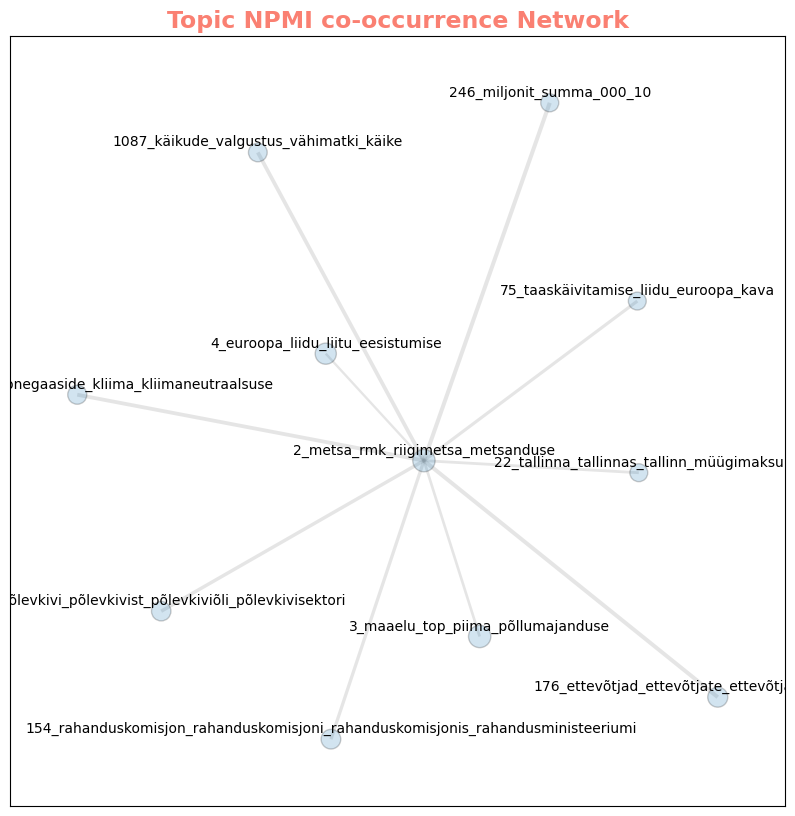

In [39]:
topic='2_metsa_rmk_riigimetsa_metsanduse'
plot_topic_pairs_ntw(df_pmi[(df_pmi.topic1==topic)|(df_pmi.topic2==topic)].tail(10),
                        weight_col='npmi',title='Topic NPMI co-occurrence Network',
                     weight_div_fac=0.1, node_size_div_fac=0.5, alpha=0.2)

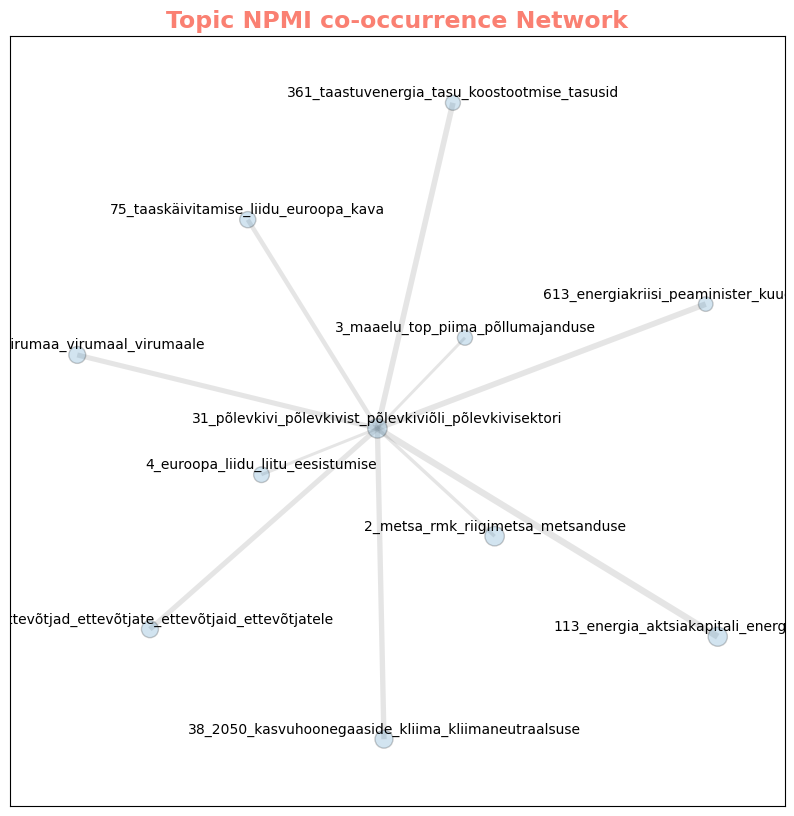

In [40]:
topic='31_põlevkivi_põlevkivist_põlevkiviõli_põlevkivisektori'
plot_topic_pairs_ntw(df_pmi[(df_pmi.topic1==topic)|(df_pmi.topic2==topic)].tail(10),
                     weight_col='npmi',title='Topic NPMI co-occurrence Network',
                     weight_div_fac=0.1, node_size_div_fac=0.5, alpha=0.2)

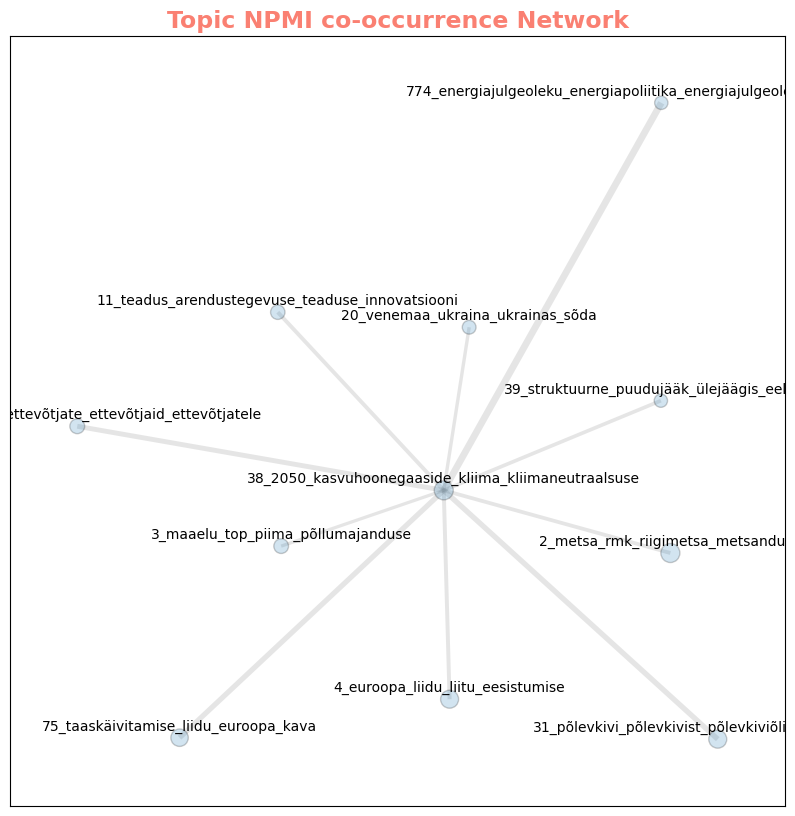

In [41]:
topic='38_2050_kasvuhoonegaaside_kliima_kliimaneutraalsuse'
plot_topic_pairs_ntw(df_pmi[(df_pmi.topic1==topic)|(df_pmi.topic2==topic)].tail(10),
                     weight_col='npmi',title='Topic NPMI co-occurrence Network',
                     weight_div_fac=0.1, node_size_div_fac=0.5, alpha=0.2)